# 动手实现逻辑回归

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 制作数据

In [185]:
def make_data(W:np.ndarray, b):
    """
    :params W: 权重
    :params b: 偏置
    """
    size = len(W)
    x = (np.random.random(20**size) * 20 - 10).reshape(-1, size)
    y = (x@W + b > 0).astype(int)

    return x, y

In [186]:
true_W = np.array([1.0, 2.0])
true_b = 0.5
x, y = make_data(true_W, true_b)
x.shape, y.shape

((200, 2), (200,))

In [187]:
# 转换为决策边界后的 w, b
new_w, new_b = - true_W[0] / true_W[1], - true_b / true_W[1]
new_w, new_b

(-0.5, -0.25)

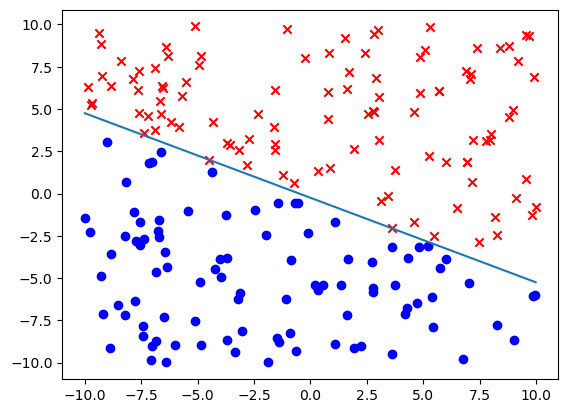

In [188]:
x_line = np.arange(-10, 10, 0.01)
y_line = new_w * x_line + new_b
ones = y == 1
zeros = y == 0
plt.scatter(*x[ones].T, marker='x', color='r', )
plt.scatter(*x[zeros].T, marker='o', color='b')
plt.plot(x_line, y_line)
plt.show()

# 对数几率回归(梯度下降)

In [253]:
# 初始化参数
w, b = np.random.random(2), np.random.rand()
w, b

(array([0.53776065, 0.4154142 ]), 0.16925847414873063)

In [254]:
alpha = 0.01     # 设置学习率
epochs = 1000    # 设置迭代次数

In [255]:
# 几率回归函数
def sigmod(w, b, x):
    return 1 / (1 + np.exp(-x@w-b))

In [256]:
# 梯度下降
loss_lst = []
for epoch in range(epochs):
    # 推理
    y_hat = sigmod(w, b, x)
    # 计算代价函数
    J = ((y - y_hat)**2).mean() / 2
    # 计算偏导
    J_sigmod = -(y - y_hat)
    sigmod_z = y_hat * (1 - y_hat)
    Jw = (x.T@(J_sigmod * sigmod_z))/len(y_hat)  
    Jb = (J_sigmod * sigmod_z).mean()
    w -= alpha * Jw
    b -= alpha * Jb
    print(f"epochs {epoch}, loss = {J}")
    loss_lst.append(J)
    

epochs 0, loss = 0.0765063795144278
epochs 1, loss = 0.07574639110765619
epochs 2, loss = 0.07498494074696305
epochs 3, loss = 0.07422227962340265
epochs 4, loss = 0.07345866624076834
epochs 5, loss = 0.072694366020394
epochs 6, loss = 0.07192965085424052
epochs 7, loss = 0.07116479860664456
epochs 8, loss = 0.07040009256575262
epochs 9, loss = 0.0696358208463419
epochs 10, loss = 0.06887227574642366
epochs 11, loss = 0.06810975306072466
epochs 12, loss = 0.06734855135482862
epochs 13, loss = 0.06658897120441937
epochs 14, loss = 0.06583131440468358
epochs 15, loss = 0.06507588315548625
epochs 16, loss = 0.06432297922841446
epochs 17, loss = 0.06357290312217807
epochs 18, loss = 0.06282595321315096
epochs 19, loss = 0.062082424908022224
epochs 20, loss = 0.06134260980559806
epochs 21, loss = 0.06060679487474974
epochs 22, loss = 0.05987526165533837
epochs 23, loss = 0.059148285488669024
epochs 24, loss = 0.058426134783641254
epochs 25, loss = 0.05770907032427638
epochs 26, loss = 0.056

In [257]:
w, b

(array([0.30940578, 0.77184326]), 0.19469411400799075)

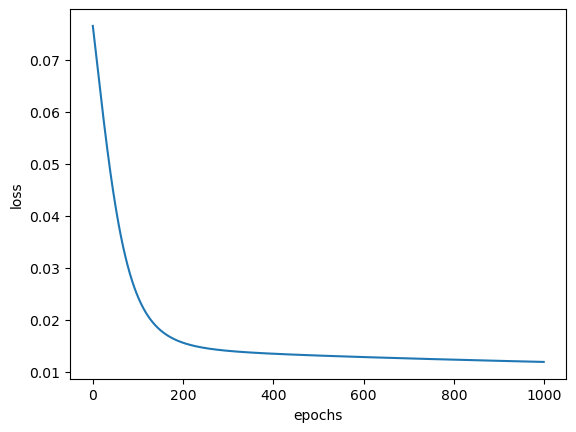

In [258]:
plt.plot(list(range(len(loss_lst))), loss_lst)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [259]:
train_w, train_b = - w[0] / w[1], - b / w[1]
train_w, train_b

(-0.4008660731083018, -0.25224566066858084)

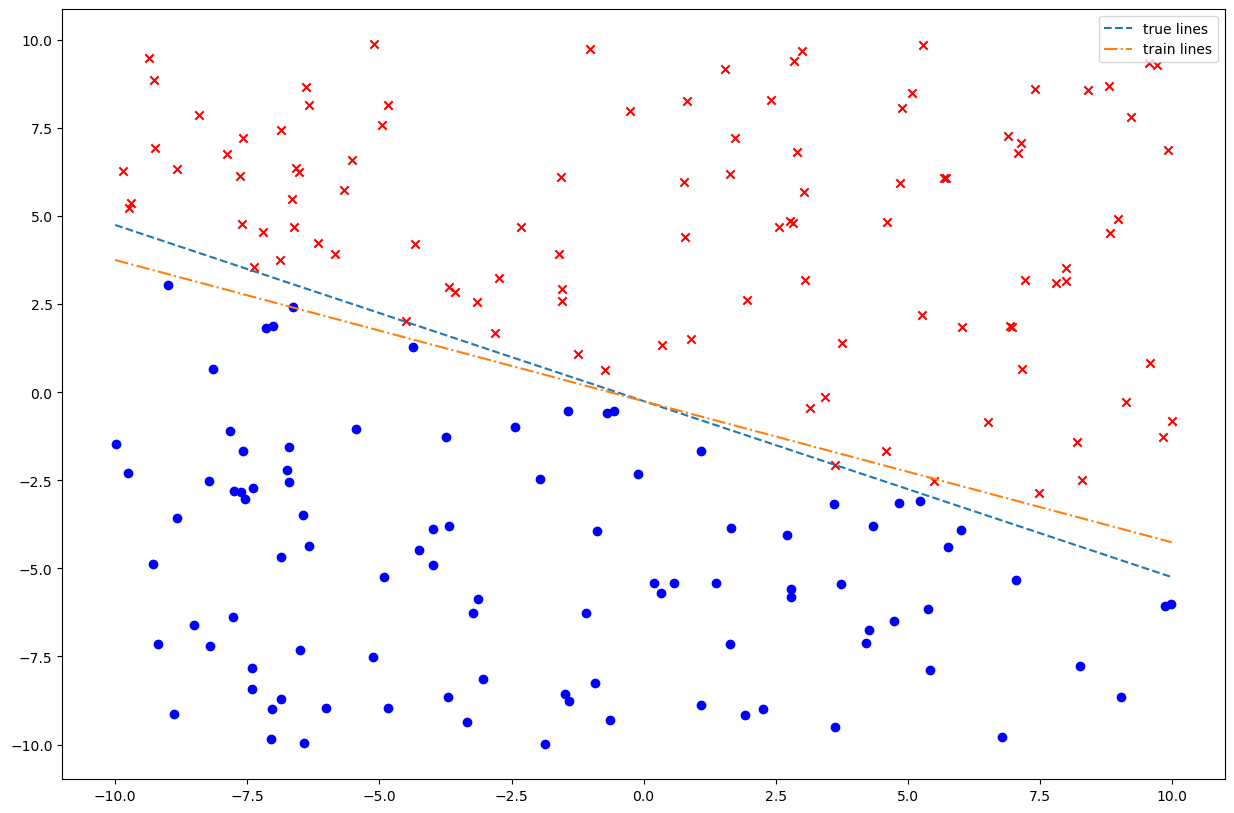

In [260]:
plt.figure(figsize=(15, 10))
x_line = np.arange(-10, 10, 0.01)
y_true = new_w * x_line + new_b
y_train = train_w * x_line + train_b
ones = y == 1
zeros = y == 0
plt.scatter(*x[ones].T, marker='x', color='r', )
plt.scatter(*x[zeros].T, marker='o', color='b')
plt.plot(x_line, y_true, ls='--', label='true lines')
plt.plot(x_line, y_train, ls='-.', label='train lines')
plt.legend()
plt.show()